In [732]:
import numpy as np
import matplotlib.pyplot as plt
import copy

%matplotlib inline

In [733]:
def Neigh4(L): 
    L2 = L**2; nn= [[]] * L2;
    for ii in range(L2):
        x=[]; 
        if (ii+1) %L != 0: x.append(ii+1); 
        if (ii+1) %L != 1: x.append(ii-1); 
        if (ii+1) in range(1,L2-L+1): x.append(ii+L);
        if (ii+1) in range(L+1,L2+1): x.append(ii-L); 
        nn[ii]=(x*1);
    return nn   

In [734]:
def Neigh4_P(L): 
    L2 = L**2; nn= [[]] * L2;
    for ii in xrange(L):
        for jj in xrange(L):
            kk=(ii+1)+L*jj;x =[];
            ix1=ii+1;
            if (ix1 == L): ix1=0;
            x.append((ix1)+L*jj);
            iy2=jj+1
            if (iy2 == L): iy2=0;
            x.append((ii)+L*iy2);
            ix3=ii-1
            if (ix3 == -1): ix3=L-1;
            x.append((ix3)+L*jj);
            iy4=jj-1
            if (iy4 == -1): iy4=L-1;  
            x.append((ii)+L*iy4);
            nn[kk-1]=(x*1);
    return nn

In [735]:
def Neigh8(L): 
    L2 = L**2; nn= [[]] * L2;
    for ii in range(L2):
        x=[]; 
        if (ii+1) %L != 0: x.append(ii+1); 
        if (ii+1) %L != 1: x.append(ii-1); 
        if (ii+1) in range(1,L2-L+1): x.append(ii+L);
        if (ii+1) in range(L+1,L2+1): x.append(ii-L);
        if ((ii+1) in range(1,L2-L+1)) and ((ii+1) %L != 0): x.append(ii+L+1);
        if ((ii+1) in range(1,L2-L+1)) and ((ii+1) %L != 1): x.append(ii+L-1);
        if ((ii+1) in range(L+1,L2+1)) and ((ii+1) %L != 0): x.append(ii-L+1);
        if ((ii+1) in range(L+1,L2+1)) and ((ii+1) %L != 1): x.append(ii-L-1);
        nn[ii]=(x*1);
    return nn   

In [736]:
def Neigh8_P(L): 
    L2 = L**2; nn= [[]] * L2;
    for ii in xrange(L):
        for jj in xrange(L):
            kk=(ii+1)+L*jj;x =[];
            ix1=ii+1;
            if (ix1 == L): ix1=0;
            x.append((ix1)+L*jj);
            iy2=jj+1
            if (iy2 == L): iy2=0;
            x.append((ii)+L*iy2);
            ix3=ii-1;
            if (ix3 == -1): ix3=L-1;
            x.append((ix3)+L*jj);
            iy4=jj-1
            if (iy4 == -1): iy4=L-1;  
            x.append((ii)+L*iy4);
            ix1=ii+1; iy2=jj+1;
            if (ix1 == L): ix1=0;
            if (iy2 == L): iy2=0;
            x.append((ix1)+L*iy2);
            ix1=ii+1;iy4=jj-1;
            if (ix1 == L): ix1=0;
            if (iy4 == -1): iy4=L-1;
            x.append((ix1)+L*iy4);
            ix3=ii-1; iy2=jj+1;
            if (ix3 == -1): ix3=L-1;
            if (iy2 == L): iy2=0;
            x.append((ix3)+L*iy2);
            ix3=ii-1; iy4=jj-1;
            if (ix3 == -1): ix3=L-1;
            if (iy4 == -1): iy4=L-1;
            x.append((ix3)+L*iy4);
            nn[kk-1]=(x*1);
    return nn

In [737]:
def Ini(Lc, Ns, Wp, Len): ##Square size, Lipids, Water %.
    ##Lipids 
    Lipids=[[]]*Ns; Pos=range(Lc**2); ii = 0;
    while ii < Ns:
        Pos2 = Pos*1; n2 = [[]] * (Lc**2); 
        for kk in xrange(Lc**2): n2[kk] = nn[kk]*1; 
        p = np.random.choice(Pos2); Pos2.remove(p);
        x = []; x.append(p); jj = 0;
        while jj < (Len-1): 
            p1 = np.random.choice(n2[p]);  
            if Pos2.count(p1) == 1:
                n2[p1].remove(p); p=p1*1;
                Pos2.remove(p); x.append(p);
                jj += 1; 
            else: break
        else: Lipids[ii] = (x*1); Pos = Pos2*1; ii += 1;       
    ##Water and Oil
    Water = []; Oil = [];
    for ii in Pos:
        if np.random.random() < Wp: Water.append(ii);
        else: Oil.append(ii);        
    return Lipids, Water, Oil

In [738]:
def Move(Lipids,Water,Oil):    
    move = False;
    while move == False:
        rn = np.random.randint(Lc**2); 
        if Water.count(rn) == 1: ##Water
            neigh = nn[rn]; Loc = [];
            for ii in xrange(len(neigh)):
                if Oil.count(neigh[ii]) == 1: Loc.append(neigh[ii]);
            if sum(Loc) != 0: 
                Loc = np.random.choice(Loc); 
                Water.remove(rn); Water.append(Loc); Oil.remove(Loc); Oil.append(rn); move = True;          
        elif Oil.count(rn) == 1: ##Oil
            neigh = nn[rn]; Loc = [];
            for ii in xrange(len(neigh)):
                if Water.count(neigh[ii]) == 1: Loc.append(neigh[ii]);      
            if sum(Loc) != 0:
                Loc = np.random.choice(Loc); 
                Oil.remove(rn); Oil.append(Loc); Water.remove(Loc); Water.append(rn); move = True;
        else: ##Lipids
            Citosol = list(np.concatenate((Water,Oil))); neighlist = [[]]*(Len+2); ##Loocking for the Lipid
            for kk in xrange(Ns):
                if Lipids[kk].count(rn) == 1: Ltmove = list(Lipids[kk]*1); index = kk; break;
            x = []; ##Rept. Which are the possible moves
            for kk in xrange(len(nn[Ltmove[0]])):
                if Citosol.count(nn[Ltmove[0]][kk]) == 1: x.append(nn[Ltmove[0]][kk]);
            neighlist[0] = (x*1); x = [];
            for kk in xrange(len(nn[Ltmove[-1]])):
                if Citosol.count(nn[Ltmove[-1]][kk]) == 1: x.append(nn[Ltmove[-1]][kk]);
            neighlist[1] = (x*1);
            x = []; ##Despl.
            for kk in xrange(len(nn[Ltmove[1]])):
                if Citosol.count(nn[Ltmove[1]][kk]) == 1: x.append(nn[Ltmove[1]][kk]);
            neighlist[2] = (x*1); x = [];
            for kk in xrange(len(nn[Ltmove[-2]])):
                if Citosol.count(nn[Ltmove[-2]][kk]) == 1: x.append(nn[Ltmove[-2]][kk]);
            neighlist[Len+1] = (x*1);
            for kk in xrange(Len-2):
                jj = kk + 1; x = []; y = [];
                for zz in xrange(len(nn[Ltmove[jj-1]])):
                    if Citosol.count(nn[Ltmove[jj-1]][zz]) == 1: x.append(nn[Ltmove[jj-1]][zz]);
                for zz in xrange(len(nn[Ltmove[jj+1]])):
                    if Citosol.count(nn[Ltmove[jj+1]][zz]) == 1: y.append(nn[Ltmove[jj+1]][zz]);
                z = set(x) & set(y); z = list(z); neighlist[jj + 2] = (z*1);
            prob=[]; ##Select possible move
            for kk in xrange(Len+2): prob.append(len(neighlist[kk]));
            if sum(prob) != 0: 
                prob = np.float_(prob)/sum(prob); SelMove = int(np.random.choice(range(Len+2),1,False,prob));
                if SelMove == 0: ##Rept. Hidrophilic head
                    Loc = np.random.choice(neighlist[0]); Ltmove = list(np.concatenate(([Loc],Ltmove))); 
                    if Water.count(Loc) == 1: Water.remove(Loc); Water.append(Ltmove[-1]); Ltmove.pop(-1);
                    else: Oil.remove(Loc); Oil.append(Ltmove[-1]); Ltmove.pop(-1);
                    Lipids[index] = Ltmove; move = True;
                elif SelMove == 1: ##Rept. of the Tail
                    Loc = np.random.choice(neighlist[1]); Ltmove = list(np.concatenate((Ltmove,[Loc]))); 
                    if Water.count(Loc) == 1: Water.remove(Loc); Water.append(Ltmove[0]); Ltmove.pop(0);
                    else: Oil.remove(Loc); Oil.append(Ltmove[0]); Ltmove.pop(0);
                    Lipids[index] = Ltmove; move = True;
                else: ##Despl 
                    Loc = np.random.choice(neighlist[SelMove]); 
                    if Water.count(Loc) == 1: Water.remove(Loc); Water.append(Ltmove[SelMove-2]); Ltmove[SelMove-2] = Loc;
                    else: Oil.remove(Loc); Oil.append(Ltmove[SelMove-2]); Ltmove[SelMove-2] = Loc;
                    Lipids[index] = Ltmove; move = True;
    return Lipids, Water, Oil

In [739]:
def Ham(Lipids, Water, Oil):
    M = np.ones(Lc**2); M[Water] = -1; H = 0;
    for kk in xrange(Ns): M[Lipids[kk][:2]] = -1;
    M = np.int_(M);
    for kk in xrange(Lc**2):
        for jj in nn[kk]:
            state = M[kk];
            if M[jj] == state: H += -1;
            else: H += 1;
    return H

In [740]:
def Matrix(Lipids,Water,Oil):
    M = np.zeros(Lc**2);  
    for ii in Oil: M[ii] = 2;
    ColorW = np.linspace(0.3,0.5,Wm); ColorO = np.linspace(1.4,1.8,Om);
    for ii in xrange(Ns): M[Lipids[ii][:Wm]] = ColorW; M[Lipids[ii][Wm:]] = ColorO;
    M = np.reshape(M,(Lc,Lc)); 
    plt.imshow(M,cmap='plasma'); 

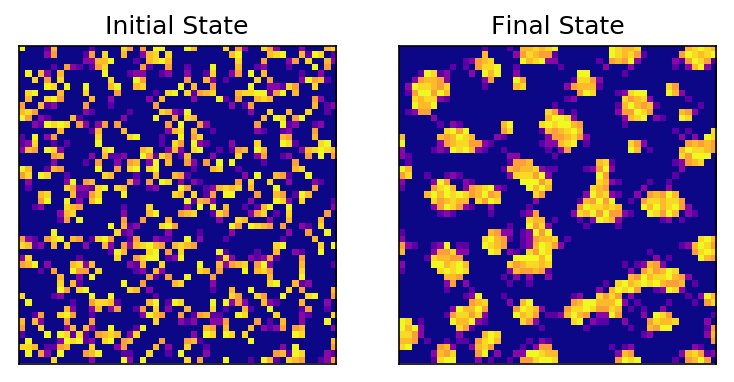

In [775]:
##Params
Lc, Ns, Wp = 50, 150, 1.;
Om, Wm = 4, 2; Len = Om + Wm;
T = 1; beta = 1./T;
McSteps = 100;
##Inicialitzation
nn = Neigh8_P(Lc); 
Lipids, Water, Oil = Ini(Lc,Ns,Wp,Len);
##Initial State
plt.figure(1,dpi=150)
plt.subplot(1,2,1);
Matrix(Lipids,Water,Oil);
plt.title('Initial State'); plt.xticks([]); plt.yticks([]);
##MonteCarlo
H_old = Ham(Lipids,Water,Oil);
for zz in xrange(Lc**2*McSteps):
    Lipids_old = [[]]*Ns; Water_old = copy.copy(Water); Oil_old = copy.copy(Oil);
    for kk in xrange(Ns): Lipids_old[kk] = Lipids[kk]*1;
    Lipids, Water, Oil = Move(Lipids, Water, Oil);
    H_new = Ham(Lipids,Water,Oil); deltaH =  H_new - H_old; 
    if np.random.rand() < np.exp(-beta*deltaH): H_old = H_new*1;
    else: Lipids = Lipids_old*1; Water = Water_old*1; Oil = Oil_old*1;
##Final State
plt.subplot(1,2,2);
Matrix(Lipids,Water,Oil);
plt.title('Final State');plt.xticks([]); plt.yticks([]);